In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
import random
import os
import numpy as np

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
random.seed(0)
np.random.seed(0)

os.environ["SLURM_JOB_ID"] = "26763022"

has_attention=True

append_sseg=True

checkpoint_dir = '/data/Jiang_Lab/Data/MT-TS-Net-checkpoint/'+os.environ["SLURM_JOB_ID"]+'/'
full_data=True


In [3]:
if full_data:
    fea_filename = checkpoint_dir + os.environ["SLURM_JOB_ID"] + '_full.npy'
else:
    fea_filename = pretrained_dir + os.environ["SLURM_JOB_ID"] + '.npy'
with open(fea_filename, 'rb') as f:
    _feas = np.load(f)
    _attention_scores = np.load(f)
    _time_to_events=np.load(f)
    _tcga_subtypes=np.load(f)
    _morphologies=np.load(f)
    _events = np.load(f)
    _immune_subtypes=np.load(f)
    _stages = np.load(f)
    _MDSCs=np.load(f)
    _CAFs=np.load(f)
    _M2s=np.load(f)
    _Exclusions=np.load(f)
    _Dysfunctions=np.load(f)
    _ctls=np.load(f)

(array([3.063e+03, 4.623e+03, 3.733e+03, 3.379e+03, 3.217e+03, 3.291e+03,
        3.299e+03, 3.381e+03, 3.580e+03, 3.757e+03, 3.912e+03, 4.039e+03,
        4.141e+03, 4.378e+03, 4.128e+03, 4.212e+03, 4.221e+03, 4.087e+03,
        4.006e+03, 3.875e+03, 3.611e+03, 3.447e+03, 3.258e+03, 2.993e+03,
        2.754e+03, 2.566e+03, 2.349e+03, 2.227e+03, 1.931e+03, 1.758e+03,
        1.693e+03, 1.497e+03, 1.320e+03, 1.178e+03, 1.168e+03, 9.620e+02,
        8.950e+02, 8.010e+02, 7.380e+02, 6.620e+02, 6.110e+02, 5.170e+02,
        4.590e+02, 3.910e+02, 3.880e+02, 3.590e+02, 3.220e+02, 3.110e+02,
        2.460e+02, 2.330e+02, 2.060e+02, 1.740e+02, 1.630e+02, 1.560e+02,
        1.360e+02, 1.210e+02, 1.120e+02, 9.400e+01, 1.020e+02, 7.700e+01,
        7.200e+01, 8.400e+01, 5.300e+01, 5.700e+01, 5.200e+01, 3.700e+01,
        3.000e+01, 2.700e+01, 3.100e+01, 2.200e+01, 3.000e+01, 1.500e+01,
        1.900e+01, 1.900e+01, 1.900e+01, 1.800e+01, 1.200e+01, 1.000e+01,
        1.000e+01, 7.000e+00, 8.000e+0

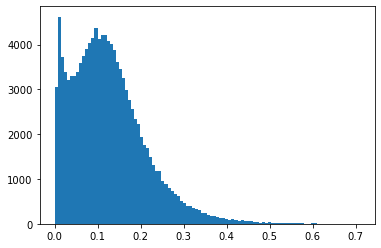

In [4]:
hist(_attention_scores.flatten(), bins=100)

In [5]:
th1=np.percentile(_attention_scores.flatten(), 25)
th2=np.percentile(_attention_scores.flatten(), 75)
low_attention_grp =  (_attention_scores.flatten()<th1)
medium_attention_grp = np.logical_and(_attention_scores.flatten()>th1, _attention_scores.flatten()<th2)
high_attention_grp = (_attention_scores.flatten()>th2)

In [6]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import gaussian_kde
import scipy.stats as st
from matplotlib import ticker, cm


def plot_features(fea_rep, ax, xd, yd, title_str, bw_method_th, vmax_th):
    x = fea_rep[:, 0]
    y = fea_rep[:, 1]
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values, bw_method=bw_method_th)
    print(kernel.factor)
    f = np.reshape(kernel(positions).T, xx.shape)
    ax[xd, yd].set_xticks(np.linspace(xmin, xmax, 10))
    ax[xd, yd].set_yticks(np.linspace(ymin, ymax, 10))
    ax[xd, yd].set_xlim(xmin, xmax)
    ax[xd, yd].set_ylim(ymin, ymax)        
    ax[xd, yd].imshow (np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect='auto', vmin=0, vmax=kernel.factor)
    gridLineWidth=0.1
    ax[xd, yd].set_axisbelow(False)
    gridlines = ax[xd, yd].get_xgridlines()+ax[xd, yd].get_ygridlines()
    plt.setp(gridlines, 'zorder', 5)
    ax[xd, yd].xaxis.grid(True, zorder=0)
    ax[xd, yd].yaxis.grid(True, zorder=0)
    ax[xd, yd].set_xticklabels([])
    ax[xd, yd].set_yticklabels([])
    #cset = ax[r_idx, col_idx].contour(xx, yy, f, colors='k')
    ax[xd, yd].xaxis.set_ticks_position('none')
    ax[xd, yd].yaxis.set_ticks_position('none')
    ax[xd, yd].set_title(title_str)
    #plt.clim(0,0.08)
    #cbar = fig.colorbar(cfset)

In [7]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import gaussian_kde
import scipy.stats as st
from matplotlib import ticker, cm


def plot_relative_density(fea_rep, fea_rep_tot, ax, xd, yd, title_str, bw_method_th, vmax_th):
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values_grp = np.vstack([fea_rep[:, 0], fea_rep[:, 1]])
    kernel_grp = st.gaussian_kde(values_grp, bw_method=bw_method_th)
    values_tot = np.vstack([fea_rep_tot[:, 0], fea_rep_tot[:, 1]])
    kernel_tot = st.gaussian_kde(values_tot, bw_method=bw_method_th)
    f_grp = np.reshape(kernel_grp(positions).T, xx.shape)
    f_tot = np.reshape(kernel_tot(positions).T, xx.shape)
    ax[xd, yd].set_xticks(np.linspace(xmin, xmax, 10))
    ax[xd, yd].set_yticks(np.linspace(ymin, ymax, 10))
    ax[xd, yd].set_xlim(xmin, xmax)
    ax[xd, yd].set_ylim(ymin, ymax)   
    rel_density_mask = f_grp < 0.001
    rel_density = (f_grp+0.001)/(f_tot+0.001)
    rel_density = log(rel_density)
    rel_density[rel_density_mask]=-vmax_th
    ax[xd, yd].imshow (np.rot90(rel_density), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect='auto', vmin=-vmax_th, vmax=vmax_th)
    gridLineWidth=0.1
    ax[xd, yd].set_axisbelow(False)
    gridlines = ax[xd, yd].get_xgridlines()+ax[xd, yd].get_ygridlines()
    plt.setp(gridlines, 'zorder', 5)
    ax[xd, yd].xaxis.grid(True, zorder=0)
    ax[xd, yd].yaxis.grid(True, zorder=0)
    ax[xd, yd].set_xticklabels([])
    ax[xd, yd].set_yticklabels([])
    #cset = ax[r_idx, col_idx].contour(xx, yy, f, colors='k')
    ax[xd, yd].xaxis.set_ticks_position('none')
    ax[xd, yd].yaxis.set_ticks_position('none')
    ax[xd, yd].set_title(title_str)
    #plt.clim(0,0.08)
    #cbar = fig.colorbar(cfset)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import gaussian_kde
import scipy.stats as st
import numpy as np
from sklearn.metrics import r2_score        
from sklearn.manifold import TSNE
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import umap
from matplotlib import pyplot

if append_sseg:
    fea_filename = checkpoint_dir + os.environ["SLURM_JOB_ID"] + '_sseg.npy'
    with open(fea_filename, 'rb') as f:
        sseg_feas = np.load(f)
        sseg = np.load(f)
        sseg = sseg*255
    feas_agg = np.concatenate((_feas, sseg_feas), axis=0)

In [9]:
from sklearn.manifold import TSNE
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import umap

_umap_reducer = umap.UMAP(n_neighbors=50, min_dist=.1, )
_feas_r_umap = _umap_reducer.fit_transform(feas_agg)

prc_threshold=1
xmin=np.percentile(_feas_r_umap[:,0],prc_threshold)
xmax=np.percentile(_feas_r_umap[:,0],100-prc_threshold)
ymin=np.percentile(_feas_r_umap[:,1],prc_threshold)
ymax=np.percentile(_feas_r_umap[:,1],100-prc_threshold)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [10]:
_feas_r_umap_sseg = _feas_r_umap[_feas.shape[0]:_feas_r_umap.shape[0],:]
_feas_r_umap = _feas_r_umap[0:_feas.shape[0], :]

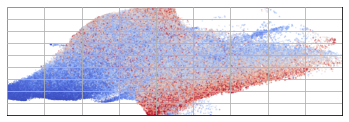

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

_c = _attention_scores.flatten()
_c[_c>0.3] =0.3
fig = plt.figure()
ax = fig.add_subplot(111, aspect=0.41)
color_map = plt.cm.get_cmap('coolwarm')
sct = ax.scatter(_feas_r_umap[:,0], _feas_r_umap[:,1], alpha=0.3, s=0.5, c=_c, cmap=color_map)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(np.linspace(xmin, xmax, 10))
ax.set_yticks(np.linspace(ymin, ymax, 10))
gridLineWidth=0.1
gridLineWidth=0.1
ax.set_axisbelow(False)
gridlines = ax.get_xgridlines()+ax.get_ygridlines()
plt.setp(gridlines, 'zorder', 5)
ax.xaxis.grid(True, zorder=0)
ax.yaxis.grid(True, zorder=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.05)
#plt.colorbar(sct, ax=cax, orientation='vertical')

# _feas_r_umap.shape

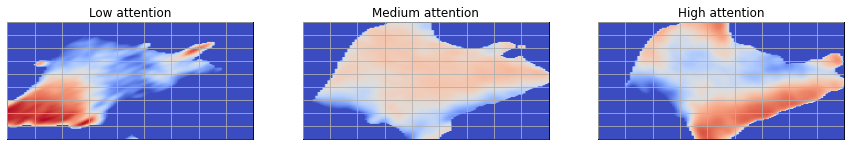

In [12]:
bw_method_th=0.1
vmax_th=1.5
fig, ax = plt.subplots(6, 3, figsize=[3*5,15])
plot_relative_density(_feas_r_umap[low_attention_grp,:], _feas_r_umap, ax, 0, 0, 'Low attention', bw_method_th, vmax_th)
plot_relative_density(_feas_r_umap[medium_attention_grp,:], _feas_r_umap, ax, 0, 1, 'Medium attention', bw_method_th, vmax_th)
plot_relative_density(_feas_r_umap[high_attention_grp,:], _feas_r_umap, ax, 0, 2, 'High attention', bw_method_th, vmax_th)
for i in [5,4,3,2,1]:
    for _ax in ax[i, :]:
        fig.delaxes(_ax)

0.1


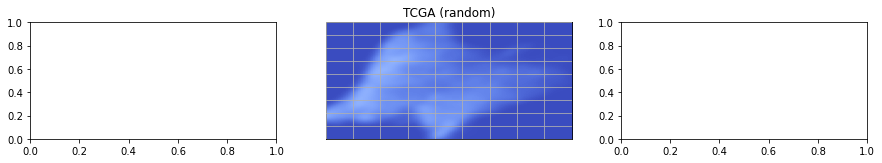

In [13]:
fig, ax = plt.subplots(6, 3, figsize=[3*5,15])
vmax_th=0.06
plot_features(_feas_r_umap, ax, 0, 1, 'TCGA (random)', bw_method_th, vmax_th)
for i in [5,4,3,2,1]:
    for _ax in ax[i, :]:
        fig.delaxes(_ax)

0.1


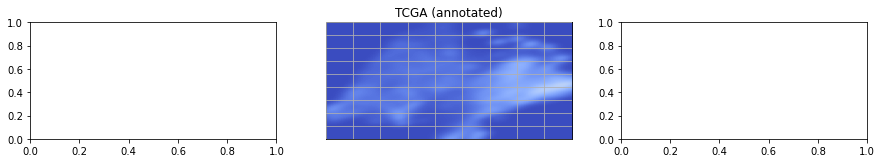

In [14]:
fig, ax = plt.subplots(6, 3, figsize=[3*5,15])
vmax_th=0.06
plot_features(_feas_r_umap_sseg, ax, 0, 1, 'TCGA (annotated)', bw_method_th, vmax_th)
for i in [5,4,3,2,1]:
    for _ax in ax[i, :]:
        fig.delaxes(_ax)

In [15]:
def density_plot(_umap, _c, f_base, sematic_dict, n_list_lables, nrows, n_columns, xmin, xmax, ymin, ymax, x_fsize, y_fsize, max_density, bw_method_th):
    
    fig, ax = plt.subplots(nrows, n_columns, figsize=[n_columns*x_fsize,y_fsize])    
    cl_idx=0
    
    num_zero_th = 0.001
    
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    
    for count in range(n_list_lables):
        cl = list_labels[cl_idx]
        print(cl_idx)
        print(cl)
        title_str = sematic_dict[int(cl)]
        x = _umap[_c==cl, 0]
        y = _umap[_c==cl, 1] 
        print(x.shape)
        print(y.shape)
        kernel = st.gaussian_kde(np.vstack([x, y]), bw_method=bw_method_th)
        f = np.reshape(kernel(positions).T, xx.shape)        
        f_rel = log((f+num_zero_th)/(f_base+num_zero_th))
        zero_mask = f < num_zero_th
        f_rel[zero_mask]=-max_density
        r_idx = int(cl_idx/n_columns)
        col_idx = cl_idx%n_columns
        print('row_idx: ' + str(r_idx))
        print('col_idx: ' + str(col_idx))
        ax[r_idx, col_idx].set_xticks(np.linspace(xmin, xmax, 10))
        ax[r_idx, col_idx].set_yticks(np.linspace(ymin, ymax, 10))
        ax[r_idx, col_idx].set_xlim(xmin, xmax)
        ax[r_idx, col_idx].set_ylim(ymin, ymax)
        #cfset = ax[r_idx, col_idx].contourf(xx, yy, f, cmap='coolwarm', levels=1)
        ax[r_idx, col_idx].imshow (np.rot90(f_rel), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect='auto', vmin=-max_density, vmax=max_density)
        gridLineWidth=0.1
        ax[r_idx, col_idx].set_axisbelow(False)
        gridlines = ax[r_idx, col_idx].get_xgridlines()+ax[r_idx, col_idx].get_ygridlines()
        plt.setp(gridlines, 'zorder', 5)
        ax[r_idx, col_idx].xaxis.grid(True, zorder=0)
        ax[r_idx, col_idx].yaxis.grid(True, zorder=0)
        ax[r_idx, col_idx].set_xticklabels([])
        ax[r_idx, col_idx].set_yticklabels([])
        #cset = ax[r_idx, col_idx].contour(xx, yy, f, colors='k')
        ax[r_idx, col_idx].xaxis.set_ticks_position('none')
        ax[r_idx, col_idx].yaxis.set_ticks_position('none')
        ax[r_idx, col_idx].set_title(title_str)
        cl_idx=cl_idx+1
    return fig, ax

[ 0.          1.00000006  2.00000012  3.00000006  4.00000024  6.00000012
  7.00000006  8.00000047  9.00000041 10.00000035 11.00000029 13.00000018
 17.00000089 18.00000083 20.00000071]
0
0.0
(16759,)
(16759,)
row_idx: 0
col_idx: 0
1
1.0000000591389835
(27328,)
(27328,)
row_idx: 0
col_idx: 1
2
2.000000118277967
(17117,)
(17117,)
row_idx: 0
col_idx: 2
3
3.000000058673322
(4911,)
(4911,)
row_idx: 1
col_idx: 0
4
4.000000236555934
(7589,)
(7589,)
row_idx: 1
col_idx: 1
5
6.000000117346644
(10,)
(10,)
row_idx: 1
col_idx: 2
6
7.000000057742
(463,)
(463,)
row_idx: 2
col_idx: 0
7
8.000000473111868
(22,)
(22,)
row_idx: 2
col_idx: 1
8
9.000000413507223
(14,)
(14,)
row_idx: 2
col_idx: 2
9
10.000000353902578
(532,)
(532,)
row_idx: 3
col_idx: 0
10
11.000000294297934
(679,)
(679,)
row_idx: 3
col_idx: 1
11
13.000000175088644
(8,)
(8,)
row_idx: 3
col_idx: 2
12
17.00000088661909
(13,)
(13,)
row_idx: 4
col_idx: 0
13
18.000000827014446
(21,)
(21,)
row_idx: 4
col_idx: 1
14
20.000000707805157
(34,)
(34,)
row_

(<Figure size 1080x1080 with 15 Axes>,
 array([[<AxesSubplot:title={'center':'outside_roi'}>,
         <AxesSubplot:title={'center':'tumor'}>,
         <AxesSubplot:title={'center':'stroma'}>],
        [<AxesSubplot:title={'center':'lymphocytic_infiltrate'}>,
         <AxesSubplot:title={'center':'necrosis_or_debris'}>,
         <AxesSubplot:title={'center':'blood'}>],
        [<AxesSubplot:title={'center':'exclude'}>,
         <AxesSubplot:title={'center':'metaplasia_NOS'}>,
         <AxesSubplot:title={'center':'fat'}>],
        [<AxesSubplot:title={'center':'plasma_cells'}>,
         <AxesSubplot:title={'center':'other_immune_infiltrate'}>,
         <AxesSubplot:title={'center':'normal_acinus_or_duct'}>],
        [<AxesSubplot:title={'center':'skin_adnexa'}>,
         <AxesSubplot:title={'center':'blood_vessel'}>,
         <AxesSubplot:title={'center':'dcis'}>]], dtype=object))

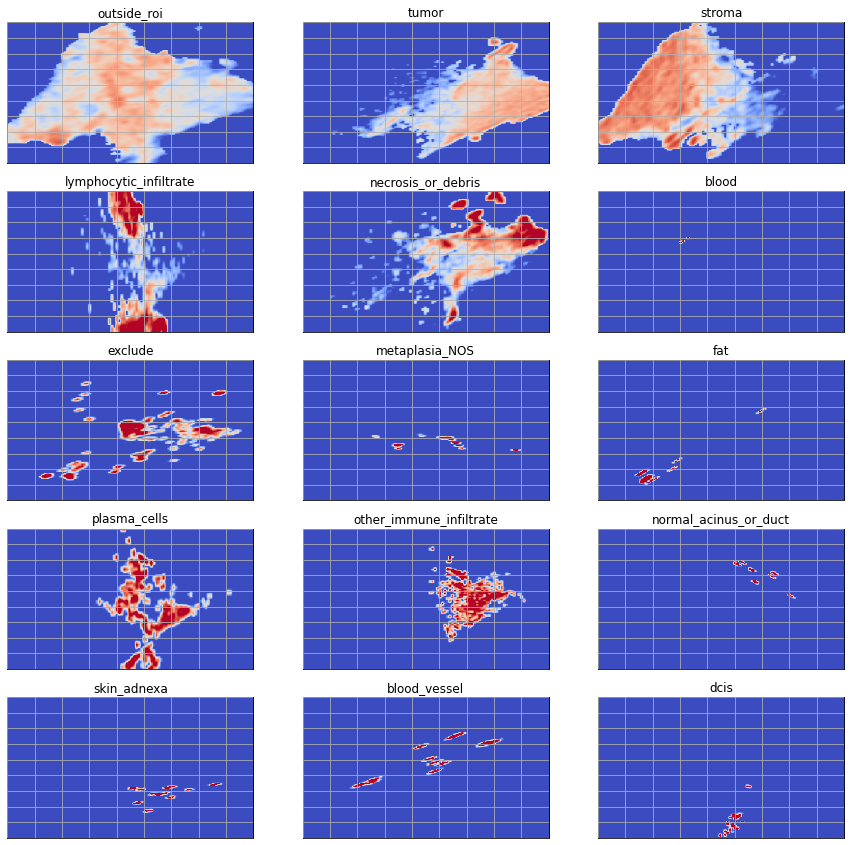

In [16]:
sematic_dict = { 0: 'outside_roi', 1: 'tumor', \
                2: 'stroma', 3: 'lymphocytic_infiltrate', \
                4: 'necrosis_or_debris', 5: 'glandular_secretions', \
                6: 'blood', 7: 'exclude', \
                8: 'metaplasia_NOS', 9: 'fat', \
                10: 'plasma_cells', 11: 'other_immune_infiltrate', \
                12: 'mucoid_material', 13: 'normal_acinus_or_duct', \
                14: 'lymphatics', 15: 'undetermined', \
                16: 'nerve', 17: 'skin_adnexa', \
                18: 'blood_vessel', 19: 'angioinvasion', \
                20: 'dcis', 21: 'other' }

task_list=['sseg']
task='sseg'

_c = sseg.reshape(sseg.shape[0])
task_val = sseg.reshape(sseg.shape[0])

list_labels=np.unique(sseg.reshape(sseg.shape[0]))
print(list_labels)
nrows=int(len(list_labels)/3)
max_density=2
bw_method_th=0.05
n_columns = int(len(list_labels)/nrows)

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
kernel_base = st.gaussian_kde(np.vstack([_feas_r_umap_sseg[:,0], _feas_r_umap_sseg[:,1]]), bw_method=bw_method_th)
f_base = np.reshape(kernel_base(positions).T, xx.shape)

density_plot(_feas_r_umap_sseg, _c, f_base, sematic_dict, len(list_labels), nrows, n_columns, xmin, xmax, ymin, ymax, 5, 15, max_density, bw_method_th)

In [17]:
if has_attention:
    grp_idx=np.logical_or(medium_attention_grp, high_attention_grp)
else:
    grp_idx=np.ones(_feas.shape[0], dtype=bool)
feas = _feas[grp_idx,:]
feas_r_umap = _feas_r_umap[grp_idx,:]
attention_scores = _attention_scores[grp_idx,:]
time_to_events=_time_to_events[grp_idx,:]
tcga_subtypes=_tcga_subtypes[grp_idx,:]
morphologies=_morphologies[grp_idx,:]
events=_events[grp_idx,:]
immune_subtypes=_immune_subtypes[grp_idx,:]
stages=_stages[grp_idx,:]
MDSCs=_MDSCs[grp_idx,:]
CAFs=_CAFs[grp_idx,:]
M2s=_M2s[grp_idx,:]
Exclusions=_Exclusions[grp_idx,:]
Dysfunctions=_Dysfunctions[grp_idx,:]
ctls=_ctls[grp_idx,:]

[ 30.  30.  30. ... 943. 943. 943.]
[6593. 6593. 6593. ... 2184. 2184. 2184.]
0
0.0
(15000,)
(15000,)
row_idx: 0
col_idx: 0
1
1.0
(15000,)
(15000,)
row_idx: 0
col_idx: 1
2
2.0
(60000,)
(60000,)
row_idx: 0
col_idx: 2
[0. 1. 2.]
0
0.0
(13707,)
(13707,)
row_idx: 0
col_idx: 0
1
1.0
(51010,)
(51010,)
row_idx: 0
col_idx: 1
2
2.0
(25283,)
(25283,)
row_idx: 0
col_idx: 2
[0. 1. 2.]
0
0.0
(68278,)
(68278,)
row_idx: 0
col_idx: 0
1
1.0
(20058,)
(20058,)
row_idx: 0
col_idx: 1
2
2.0
(1664,)
(1664,)
row_idx: 0
col_idx: 2
[0. 1. 2. 3. 4.]
0
0.0
(41319,)
(41319,)
row_idx: 0
col_idx: 0
1
1.0
(15699,)
(15699,)
row_idx: 0
col_idx: 1
2
2.0
(15915,)
(15915,)
row_idx: 0
col_idx: 2
3
3.0
(6347,)
(6347,)
row_idx: 0
col_idx: 3
4
4.0
(10720,)
(10720,)
row_idx: 0
col_idx: 4
[0. 1. 2. 3. 5.]
0
0.0
(29977,)
(29977,)
row_idx: 0
col_idx: 0
1
1.0
(34842,)
(34842,)
row_idx: 0
col_idx: 1
2
2.0
(16114,)
(16114,)
row_idx: 0
col_idx: 2
3
3.0
(6762,)
(6762,)
row_idx: 0
col_idx: 3
4
5.0
(2305,)
(2305,)
row_idx: 0
col_idx: 4


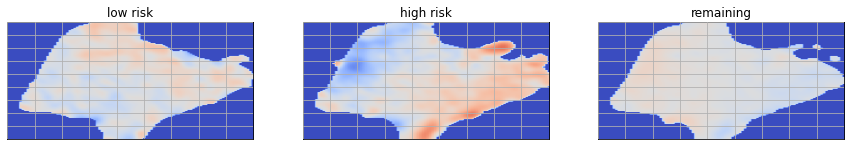

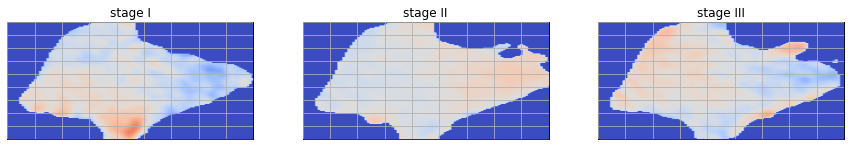

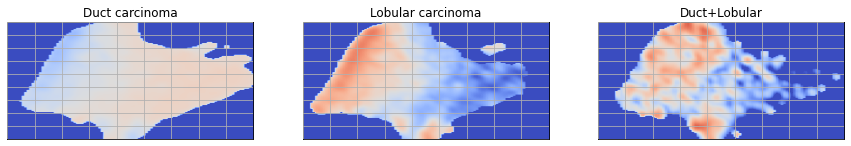

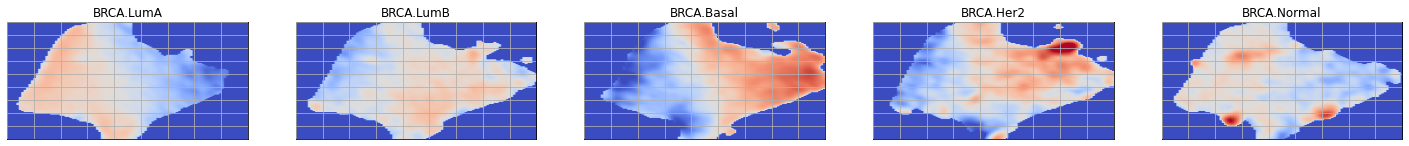

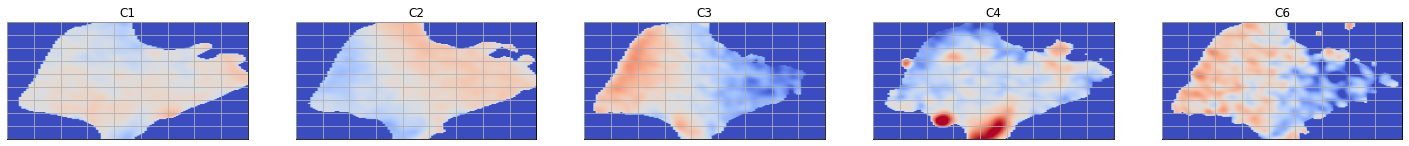

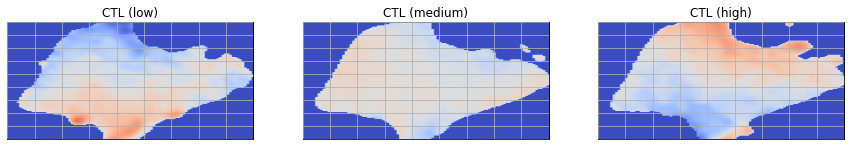

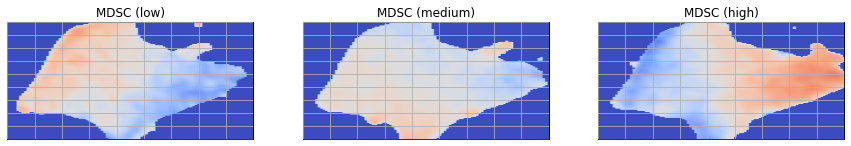

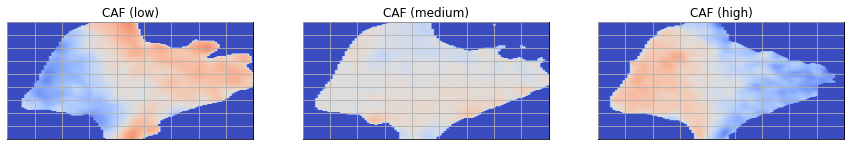

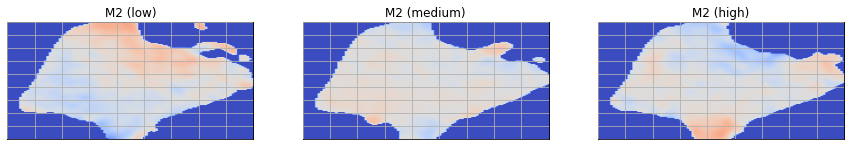

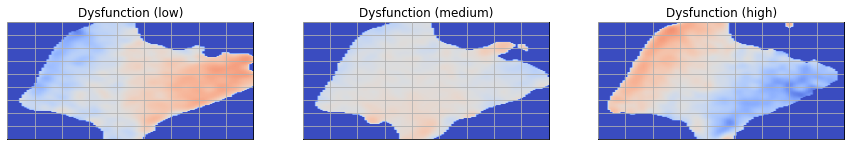

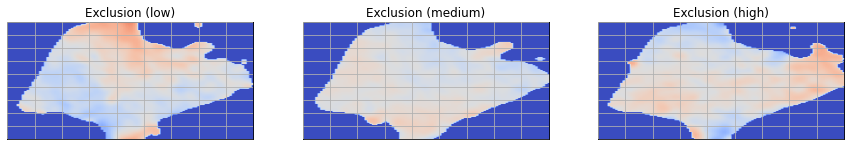

In [18]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import gaussian_kde
import scipy.stats as st
import numpy as np
from sklearn.metrics import r2_score

task_list=['prognosis', 'stage', 'morphology', 'subtyping', 'immune_subtype', 'ctl', 'MDSC', 'CAF', 'M2', 'Dysfunction', 'Exclusion']
t = [i[0] for i in time_to_events]
e = list(events.flatten())
t_adj = [t[i]*e[i] for i in range(len(t))]
for i in range(len(t_adj)):
    if t_adj[i]==0.0:
        t_adj[i]=100000
high_risk_individuals = np.argsort(t_adj)[0:15000]
print(np.sort(t_adj)[0:15000])
low_risk_individuals = np.argsort(t)[::-1][0:15000]
print(np.sort(t)[::-1][0:15000])
for task in task_list:
    if task == 'prognosis':
        grp=np.zeros(len(t))
        for i in range(len(t)):
            if i in high_risk_individuals:
                grp[i]=1
            elif i in low_risk_individuals:
                grp[i]=0
            else:
                grp[i]=2
        _c = grp
        list_labels=np.unique(_c)
        _dict = {0: 'low risk', 1: 'high risk', 2: 'remaining'}
        n_columns = 3
    elif task == 'immune_subtype':
        list_labels=np.unique(immune_subtypes)
        print(list_labels)
        _c = immune_subtypes.flatten()
        _dict = {0: 'C1', 1: 'C2', 2: 'C3', \
                        3: 'C4', 5: 'C6'} 
        n_columns = 5
    elif task == 'subtyping':
        list_labels=np.unique(tcga_subtypes)
        print(list_labels)
        _c = tcga_subtypes.flatten()
        _dict = { 0: 'BRCA.LumA', 1: 'BRCA.LumB', 2: 'BRCA.Basal', \
                        3: 'BRCA.Her2', 4: 'BRCA.Normal'}
        n_columns = 5
    elif task == 'morphology':
        list_labels=np.unique(morphologies)
        print(list_labels)
        _c = morphologies.flatten()
        _dict = { 0: 'Duct carcinoma', 1: 'Lobular carcinoma', 2: 'Duct+Lobular'}
        n_columns = 3
    elif task == 'stage':
        list_labels=np.unique(stages)
        print(list_labels)
        _c = stages.flatten()
        _dict = { 0: 'stage I', 1: 'stage II', 2: 'stage III'}
        n_columns = 3
    else:
        n_columns = 3
        if task== 'ctl':
            _dict = { 0: 'CTL (low)', 1: 'CTL (medium)', 2: 'CTL (high)' }
            task_val = ctls.flatten()
        elif task =='MDSC':
            _dict = { 0: 'MDSC (low)', 1: 'MDSC (medium)', 2: 'MDSC (high)' }
            task_val = MDSCs.flatten()
        elif task =='CAF':
            _dict = { 0: 'CAF (low)', 1: 'CAF (medium)', 2: 'CAF (high)' }
            task_val = CAFs.flatten()
        elif task =='M2':
            _dict = { 0: 'M2 (low)', 1: 'M2 (medium)', 2: 'M2 (high)' }
            task_val = M2s.flatten()
        elif task=='Dysfunction':
            _dict = { 0: 'Dysfunction (low)', 1: 'Dysfunction (medium)', 2: 'Dysfunction (high)' }
            task_val = Dysfunctions.flatten()
        elif task=='Exclusion':
            _dict = { 0: 'Exclusion (low)', 1: 'Exclusion (medium)', 2: 'Exclusion (high)' }
            task_val = Exclusions.flatten()
        list_labels =[0, 1, 2]
        _c = np.zeros(len(task_val))
        task_val_25th = np.percentile(task_val, 25)
        task_val_75th = np.percentile(task_val, 75)
        for i in range(len(task_val)):
            if task_val[i] < task_val_25th:
                _c[i]=0
            elif task_val[i] < task_val_75th:
                _c[i]=1
            else:
                _c[i]=2
                                
    nrows = 6
    max_density=1.5
    bw_method_th=0.1
    
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    kernel_base = st.gaussian_kde(np.vstack([feas_r_umap[:,0], feas_r_umap[:,1]]), bw_method=bw_method_th)
    f_base = np.reshape(kernel_base(positions).T, xx.shape)
                
    fig, ax = density_plot(feas_r_umap, _c, f_base, _dict, len(list_labels), nrows, n_columns, xmin, xmax, ymin, ymax, 5, 15, max_density, bw_method_th)
    for i in [5,4,3,2,1]:
        for _ax in ax[i, :]:
            fig.delaxes(_ax)
    #plt.title(task)